# KDDM Group 17


## 0: Package and df Import 

Importing and load necessary packages

In [1897]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# For logistic regression
from sklearn.model_selection import train_test_split  # Split df into training set
#from sklearn.linear_model import LogisticRegression # Using to predict category
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



## 1: Data Understanding

#### Set directory and load data

In [1898]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('data_7.csv')

#### Overview and summary of the data

In [1899]:
df.shape
#print(df.head())
#print(df.info())

# Summary Statistics
print(df.describe())

# Exportiert summary Tabelle
#summary_stats = df.describe()
#summary_stats.to_excel('summary_statistics.xlsx', index=True)


         Bedrooms   Bathrooms  SquareFootageHouse         Age  \
count  618.000000  630.000000          995.000000  868.000000   
mean     1.621359    1.658730          175.727638   43.324885   
std      0.941909    0.922796          821.254214   18.770587   
min      1.000000    1.000000         -895.000000  -94.000000   
25%      1.000000    1.000000           53.000000   33.000000   
50%      1.000000    1.000000           86.000000   45.000000   
75%      2.000000    2.000000          116.000000   57.000000   
max      5.000000    5.000000         8578.000000   71.000000   

       SquareFootageGarden  PreviousOwnerRating  HeatingCosts        Price  
count           995.000000           995.000000    516.000000   995.000000  
mean             11.538693             2.576905    125.134496   253.826843  
std               7.898836             0.894898    507.796163   428.592868  
min               6.000000             1.000000   -443.000000    29.123820  
25%               6.000000   

## 2: Data Preparation

#### How are the NA's distributed?

In [1900]:
# Handling Missing Values
#print(df.isna().sum())

#Drop na (HeatingType), removes the 5 missing values across all values
df = df.dropna(how='all').copy()
#print(df.isna().sum())
#print(df.head())

#Remove all missing data
# !! Not for Pool
#df = df.dropna().copy()
missing_values_count = df.isna().sum()
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
Bedrooms               377
Bathrooms              365
SquareFootageHouse       0
Location               194
Age                    127
PoolQuality            643
HasPhotovoltaics        79
HeatingType              0
HasFiberglass            0
IsFurnished              0
DateSinceForSale         0
HouseColor               8
PreviousOwnerName      146
HasFireplace             0
KitchensQuality          0
BathroomsQuality         0
BedroomsQuality          0
LivingRoomsQuality       0
SquareFootageGarden      0
PreviousOwnerRating      0
HeatingCosts           479
WindowModelNames         0
Price                    0
dtype: int64


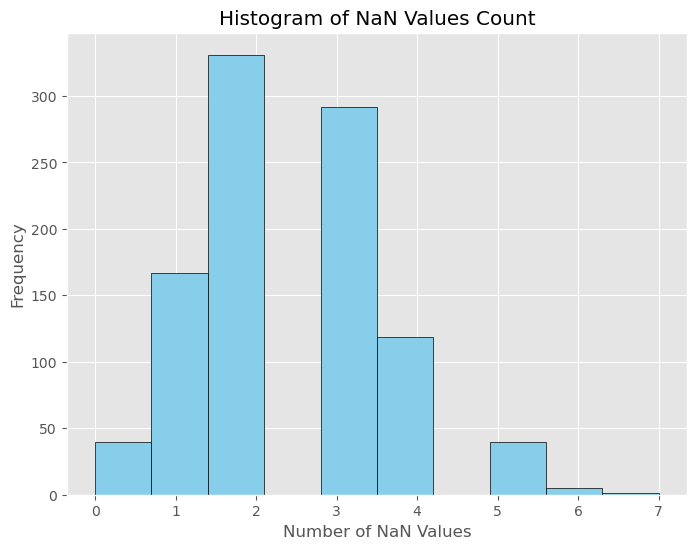

In [1901]:

# Create column counting NA's
df['NaCount'] = df.isna().sum(axis=1)


# Plot a histogram for the 'NaCount' column
plt.figure(figsize=(8, 6))
plt.hist(df['NaCount'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of NaN Values')
plt.ylabel('Frequency')
plt.title('Histogram of NaN Values Count')
plt.grid(True)
plt.show()


In [1902]:
df.shape

(995, 24)

#### Data type transformation

In [1903]:
# Location
# There are 4 instead of 3 categories:
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
# The typo will be corrected and the data summarized
df['Location'].replace('Suburbann', 'Suburban', inplace=True)
pd.Categorical(df['Location'])

# Heating Type
# There are 5 instead of 3 categories:
# ['Electric', 'Electricity', 'Gas', 'Oil', 'Oil Heating'] 
# The data will be summarized
# ['Electric', 'Gas', 'Oil']
df['HeatingType'].replace('Electricity', 'Electric', inplace=True)
df['HeatingType'].replace('Oil Heating', 'Oil', inplace=True)
pd.Categorical(df['HeatingType'])

['Gas', 'Electric', 'Gas', 'Electric', 'Oil', ..., 'Gas', 'Oil', 'Oil', 'Electric', 'Electric']
Length: 995
Categories (3, object): ['Electric', 'Gas', 'Oil']

#### Test for categories

In [1904]:
# Pool Quality
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['PoolQuality'])

# Has Photovoltaics 
# Bool
# [False, True]
pd.Categorical(df['HasPhotovoltaics'])

# Heating Type 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['HeatingType'])

# Has Fiberglass
# Bool
# [False, True]
pd.Categorical(df['HasFiberglass'])

# Is Furnished
# Bool
# [False, True]
pd.Categorical(df['IsFurnished'])

# House Color 
# 4 categories:
# ['Gray', 'Green', 'White', 'Yellow']
pd.Categorical(df['HouseColor'])

# Has Fireplace 
# Bool
# [False, True]
pd.Categorical(df['HasFireplace'])

# Kitchens Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['KitchensQuality'])

# Bathrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BathroomsQuality'])

# Bedrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BedroomsQuality'])

# Livingrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['LivingRoomsQuality'])

# Previous Ownder Rating
# 1.00 to 4.97
# [1.00, 1.01, 1.02, 1.03, ..., 4.93, 4.94, 4.96, 4.97]
pd.Categorical(df['PreviousOwnerRating'])

# Window Model Names
# Way too many categories
# 995
# Each house has its own category (No duplicates)
pd.Categorical(df['WindowModelNames'])
print(len(df['WindowModelNames']))
duplicates_mask = df['WindowModelNames'].duplicated()
duplicates_df = df[duplicates_mask]
print("Duplicate rows:")
print(duplicates_df)

995
Duplicate rows:
Empty DataFrame
Columns: [Bedrooms, Bathrooms, SquareFootageHouse, Location, Age, PoolQuality, HasPhotovoltaics, HeatingType, HasFiberglass, IsFurnished, DateSinceForSale, HouseColor, PreviousOwnerName, HasFireplace, KitchensQuality, BathroomsQuality, BedroomsQuality, LivingRoomsQuality, SquareFootageGarden, PreviousOwnerRating, HeatingCosts, WindowModelNames, Price, NaCount]
Index: []


#### Test for duplicates

In [1905]:
df.loc[df.duplicated()]
# No duplicate rows 

Empty DataFrame
Columns: [Bedrooms, Bathrooms, SquareFootageHouse, Location, Age, PoolQuality, HasPhotovoltaics, HeatingType, HasFiberglass, IsFurnished, DateSinceForSale, HouseColor, PreviousOwnerName, HasFireplace, KitchensQuality, BathroomsQuality, BedroomsQuality, LivingRoomsQuality, SquareFootageGarden, PreviousOwnerRating, HeatingCosts, WindowModelNames, Price, NaCount]
Index: []

#### Output of all cases with SquareFootageHouse <0

In [1906]:
# Count the cases where 'SquareFootageHouse       ' is smaller than 0
negative_square_footage_house_count = (df['SquareFootageHouse'] < 0).sum()

# Display the count
print("Number of cases where SquareFootageHouse is smaller than 0:", negative_square_footage_house_count)

# Filter the DataFrame to get rows where 'SquareFootageHouse' is smaller than 0
negative_square_footage_house_cases = df[df['SquareFootageHouse'] < 0]
# Print the cases where 'SquareFootageHouse       ' is smaller than 0
print("Cases where SquareFootageHouse  is smaller than 0:")
print(negative_square_footage_house_cases)

# There are 8 cases
# I would suggest to simply make them positive (Could be just a typo)


# Correcting negative values in the SquareFootageHouse column # Paul
df.loc[df['SquareFootageHouse'] < 0, 'SquareFootageHouse'] = df['SquareFootageHouse'] * -1
print(f"Remaining number of houses with negative Square Footage: {(df['SquareFootageHouse'] < 0).sum()}")

Number of cases where SquareFootageHouse is smaller than 0: 8
Cases where SquareFootageHouse  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
48        2.0        3.0              -634.0     Rural  45.0        Poor   
290       1.0        2.0              -658.0       NaN  54.0         NaN   
316       1.0        1.0              -727.0     Rural  27.0         NaN   
479       3.0        NaN              -682.0     Rural  46.0         NaN   
481       2.0        1.0              -232.0     Urban  48.0         NaN   
531       3.0        NaN              -265.0     Urban  23.0         NaN   
778       1.0        NaN              -895.0  Suburban  15.0         NaN   
971       NaN        NaN              -222.0     Rural   NaN         NaN   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
48             False    Electric          True        True       2021-06-20   
290            False    Electric         Fal

#### Output of all cases with Age <0

In [1907]:
# Count the cases where 'Age' is smaller than 0
negative_age_house_count = (df['Age'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_age_house_count)

# Filter the DataFrame to get rows where 'Age' is smaller than 0
negative_age_house_cases = df[df['Age'] < 0]
# Print the cases where 'Age' is smaller than 0
print("Cases where Age  is smaller than 0:")
print(negative_age_house_cases)

# There are 12 cases
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay

# Correcting negative values in the Age column  # Paul
df.loc[df['Age'] < 0, 'Age'] = df['Age'] * -1

print(f"Remaining number of houses with negative age: {(df['Age'] < 0).sum()}")


Number of cases where Age is smaller than 0: 12
Cases where Age  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
69        NaN        2.0                64.0     Urban -14.0         NaN   
172       2.0        1.0                81.0     Urban -43.0        Poor   
174       2.0        1.0                98.0  Suburban  -1.0         NaN   
201       2.0        3.0               111.0     Urban -32.0         NaN   
236       2.0        1.0                92.0     Rural -94.0         NaN   
274       1.0        1.0                88.0     Rural -34.0         NaN   
324       NaN        2.0                90.0       NaN -64.0        Poor   
371       NaN        3.0               112.0  Suburban -69.0        Good   
470       NaN        NaN               136.0     Rural  -1.0        Good   
656       1.0        NaN                27.0     Urban  -1.0         NaN   
781       1.0        1.0                40.0       NaN -18.0   Excellent   
793 

#### Output of all cases with HeatingCost <0

In [1908]:
# Count the cases where 'HeatingCost' is smaller than 0
negative_heating_cost_count = (df['HeatingCosts'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_heating_cost_count)

# Filter the DataFrame to get rows where 'HeatingCost' is smaller than 0
negative_heating_cost_cases = df[df['HeatingCosts'] < 0]
# Print the cases where 'HeatingCost' is smaller than 0
print("Cases where HeatingCost  is smaller than 0:")
print(negative_heating_cost_cases)

# There are 5 cases 
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay # Nik

# Correcting negative values in the HeatingCosts column  # Paul
df.loc[df['HeatingCosts'] < 0, 'HeatingCosts'] = df['HeatingCosts'] * -1

print(f"Remaining number of houses with negative heating costs: {(df['HeatingCosts'] < 0).sum()}")

Number of cases where Age is smaller than 0: 5
Cases where HeatingCost  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
158       2.0        NaN                98.0     Rural  37.0         NaN   
228       2.0        NaN                99.0     Urban  50.0   Excellent   
666       2.0        2.0               100.0       NaN  36.0        Good   
895       2.0        1.0                67.0     Urban  40.0        Good   
924       1.0        1.0                40.0  Suburban  33.0         NaN   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
158            False    Electric         False       False       2022-12-15   
228             True    Electric         False        True       2021-01-30   
666            False         Oil         False       False       2023-02-20   
895            False         Gas         False        True       2021-04-24   
924             True    Electric          True        Tru

#### Comparison of Age and DateSinceForSale

In [1909]:
# Extracts the Year since the house is for sale
df['Year'] = df['DateSinceForSale'].str.extract(r'(\d{4})')
# Converting the 'Year' column to numeric # Paul
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculates the Year, the house was build in
df['NewAge'] =  2024 - df['Age'] 

# Subtracts Age the house was build in from the Year since sale, to look for anomalies
result = df[df['Year'] < df['NewAge']]
print(result)

# Shows no errors/anomalies in the code, expect the cases with negative Age 
# and houses that were build this year and were put up for sale

     Bedrooms  Bathrooms  SquareFootageHouse  Location  Age PoolQuality  \
174       2.0        1.0                98.0  Suburban  1.0         NaN   
248       NaN        2.0                82.0     Rural  3.0         NaN   
289       1.0        NaN                58.0     Rural  0.0         NaN   
437       2.0        2.0                66.0  Suburban  0.0   Excellent   
470       NaN        NaN               136.0     Rural  1.0        Good   
656       1.0        NaN                27.0     Urban  1.0         NaN   
793       1.0        1.0                37.0       NaN  1.0         NaN   
887       1.0        NaN                59.0  Suburban  1.0        Poor   
956       2.0        2.0                90.0  Suburban  0.0         NaN   
976       3.0        NaN               146.0  Suburban  0.0        Good   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
174             True    Electric         False        True       2022-02-15   
248            F

Calculating General Square Footage

In [1910]:
#Overall Square Footage
# Negative Outliners need to be corrected first!
df['general_square_footage'] = df['SquareFootageHouse'] + df['SquareFootageGarden']
print(df['general_square_footage'].describe())


count     995.000000
mean      195.939698
std       819.625602
min        25.000000
25%        66.000000
50%        97.000000
75%       128.000000
max      8608.000000
Name: general_square_footage, dtype: float64


#### Recoding to numeric values 

Location

In [1911]:
df['Location'].replace('Rural', '1', inplace=True)
df['Location'].replace('Suburban', '2', inplace=True)
df['Location'].replace('Urban', '3', inplace=True)
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
df['Location_numeric'] = pd.to_numeric(df['Location'], errors='coerce')

Heating Types

In [1912]:
df['HeatingType'].replace('Electric', '1', inplace=True)
df['HeatingType'].replace('Gas', '2', inplace=True)
df['HeatingType'].replace('Oil', '3', inplace=True)
df['HeatingType_numeric'] = pd.to_numeric(df['HeatingType'], errors='coerce')

Booleans to Numeric

In [1913]:
# Convert custom strings to booleans
df['HasPhotovoltaics'] = df['HasPhotovoltaics'].astype(bool)
df['HasFiberglass'] = df['HasFiberglass'].astype(bool)
df['IsFurnished'] = df['IsFurnished'].astype(bool)
df['HasFireplace'] = df['HasFireplace'].astype(bool)

In [1914]:
df['HasPhotovoltaics_numeric'] = df['HasPhotovoltaics'].astype(float)
df['HasFiberglass_numeric'] = df['HasFiberglass'].astype(float)
df['IsFurnished_numeric'] = df['IsFurnished'].astype(float)
df['HasFireplace_numeric'] = df['HasFireplace'].astype(float)

#### Calculating Room Count

In [1915]:
# Overall Room Count 
# Negative Outliners need to be corrected first! 
df['Rooms'] = df['Bedrooms'] + df['Bathrooms'] 
#print(df['Rooms'].describe()) 
#df['Rooms'] 

#### Calculating Overall House Quality

In [1916]:
# Overall House Quality
# Quality Categories need to be converted to numeric values
category_map = {'Excellent': 3, 'Good': 2, 'Poor': 1}

# Convert categorical values to numerical values
df["PoolQuality"] = df["PoolQuality"].replace(category_map)
df["KitchensQuality"] = df["KitchensQuality"].replace(category_map)
df["BathroomsQuality"] = df["BathroomsQuality"].replace(category_map)
df["BedroomsQuality"] = df["BedroomsQuality"].replace(category_map)
df["LivingRoomsQuality"] = df["LivingRoomsQuality"].replace(category_map)

# Calculate average score across columns
df["overall_quality"] = df["PoolQuality"] + df["KitchensQuality"] + df["BathroomsQuality"] + df["BedroomsQuality"] + df["LivingRoomsQuality"] 
#print(df["overall_quality"].describe())

# Count the number of non-missing values for each row
num_non_missing_values = df[["PoolQuality", "KitchensQuality", "BathroomsQuality", "BedroomsQuality", "LivingRoomsQuality"]].notnull().sum(axis=1)
#num_non_missing_values.describe()

# Calculate the average overall quality score
df["average_overall_quality"] = df["overall_quality"] / num_non_missing_values.replace(0, np.nan)  # Replace 0 with NaN to handle division by zero

# Print summary statistics of the average overall quality score
#print(df["average_overall_quality"].describe())

### Handling NA's

#### Creating variable 'HasPool' Assuming Houses with Pool Quality = NA don't have a pool

In [1917]:
# Create a new column 'HasPool' based on the presence of 'PoolQuality'
df['HasPool'] = df['PoolQuality'].notna().astype(int)

<Axes: >

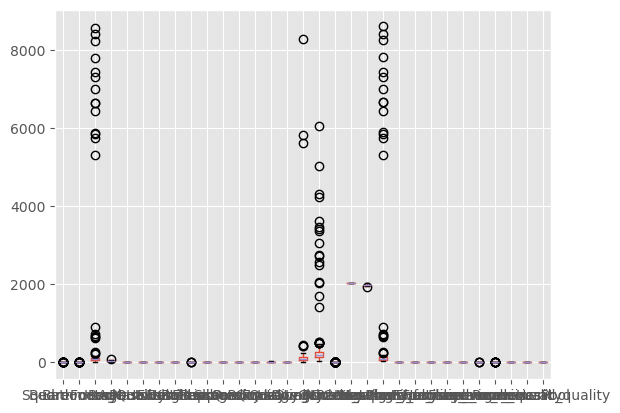

In [1918]:
df.boxplot()

### Outlier Handling
##### Difficulty: how to treat extreme values
-> for training the model, values below 3 SD are not included

In [1919]:
# Identify outliers for Price and Squarefootage

# Calculate mean and standard deviation
price_mean = df['Price'].mean()
price_std = df['Price'].std()
square_feet_mean = df['SquareFootageHouse'].mean()
square_feet_std = df['SquareFootageHouse'].std()

# Define bounds for being within 3 standard deviations
price_upper_bound = price_mean + 3 * price_std
price_lower_bound = price_mean - 3 * price_std
square_feet_upper_bound = square_feet_mean + 3 * square_feet_std
square_feet_lower_bound = square_feet_mean - 3 * square_feet_std

# Filter data for outliers
extreme_prices = df[(df['Price'] > price_upper_bound) | (df['Price'] < price_lower_bound)]
extreme_square_feet = df[(df['SquareFootageHouse'] > square_feet_upper_bound) | 
                           (df['SquareFootageHouse'] < square_feet_lower_bound)]

# Print results
print("Extreme Prices:\n", extreme_prices[['Price', 'SquareFootageHouse']])
print("Extreme Square Feet:\n", extreme_square_feet[['Price', 'SquareFootageHouse']])

df_filtered_price_sf = df[
    (df['Price'] >= price_lower_bound) & (df['Price'] <= price_upper_bound) &
    (df['SquareFootageHouse'] >= square_feet_lower_bound) & 
    (df['SquareFootageHouse'] <= square_feet_upper_bound)
]


Extreme Prices:
          Price  SquareFootageHouse
13   3456.1926                74.0
114  3064.1810                66.0
244  2506.0022               112.0
419  5041.2354               136.0
439  6050.5916                76.0
458  2578.1786                41.0
561  3620.8370               108.0
566  4229.2804                48.0
604  3419.3726                77.0
625  4311.0886                79.0
698  1688.5490               106.0
814  2749.9452                91.0
877  2733.1256                81.0
906  2045.7770                66.0
935  3353.4360                61.0
970  2032.4594                28.0
Extreme Square Feet:
          Price  SquareFootageHouse
14    51.50734              5871.0
94   118.74909              6653.0
183  528.42211              8578.0
209  191.94354              6641.0
272  177.42720              8403.0
287  301.07468              6997.0
469  113.91137              5842.0
482   90.84932              5747.0
515  133.81882              8223.0
555  166.75554  

In [1920]:
# Before doing the MLR for heating cost imputation 

df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)

#### Replace NA's in Heating Costs through Square Footage

In [1921]:
# Rows where 'HeatingCosts' is not missing
hc_train_df = df.dropna(subset=['HeatingCosts'])

# Rows where 'HeatingCosts' is missing
hc_missing_df = df[df['HeatingCosts'].isnull()]

In [1922]:
features = ['SquareFootage', 'Bedrooms', 'Bathrooms']


# Define the model
model = LinearRegression()
hc_train_df['SquareFootageHouse'] = winsorize(hc_train_df['SquareFootageHouse'], limits=[0.05, 0.05])

# Fit the model
hc_X_train = hc_train_df[['SquareFootageHouse', 'Bedrooms', 'Bathrooms']].dropna()
hc_y_train = hc_train_df['HeatingCosts']
model.fit(hc_X_train, hc_y_train)

/var/folders/69/gvpmt5qs5ynb0smwtxv8r5s80000gn/T/ipykernel_34508/3699579775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_train_df['SquareFootageHouse'] = winsorize(hc_train_df['SquareFootageHouse'], limits=[0.05, 0.05])


LinearRegression()

In [1923]:
# Predicting HeatingCosts
hc_X_missing = hc_missing_df[['SquareFootageHouse', 'Bedrooms', 'Bathrooms']].dropna()
predicted_HeatingCosts = model.predict(hc_X_missing)

# Fill in the missing values in the original DataFrame
df.loc[df['HeatingCosts'].isnull(), 'HeatingCosts'] = predicted_HeatingCosts

##### Na's will be replaced by Median values

In [1924]:
float_columns = df.select_dtypes(include=['float64']).columns
df_float = df[float_columns]
df_median = df_float.fillna(df_float.median())

In [1925]:
df = df_median.copy()

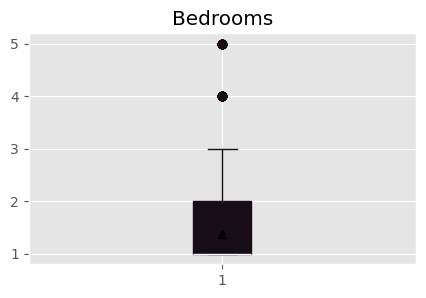

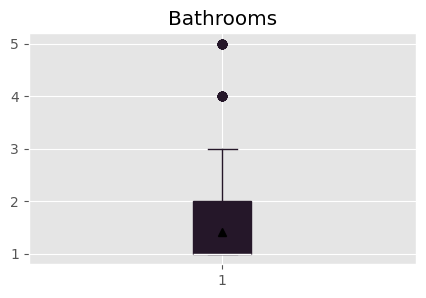

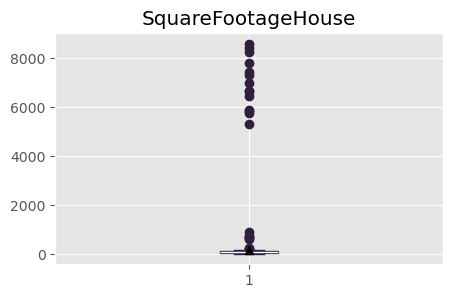

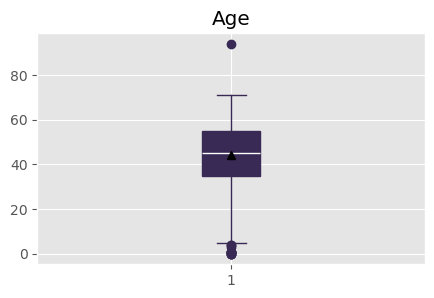

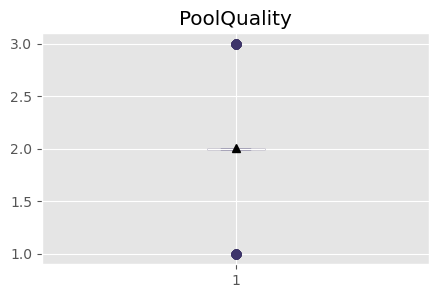

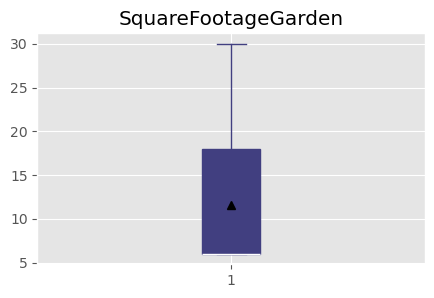

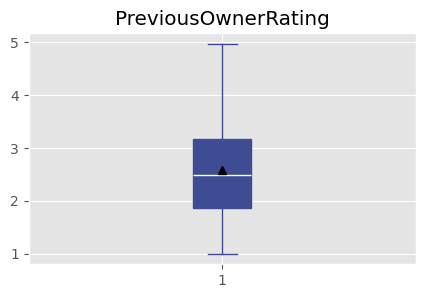

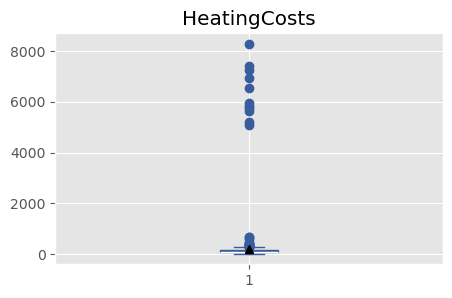

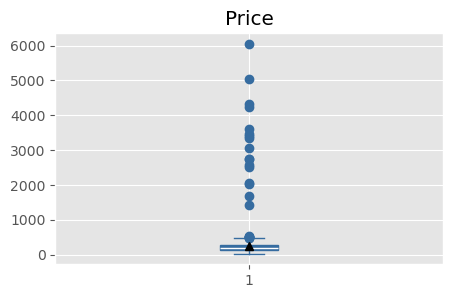

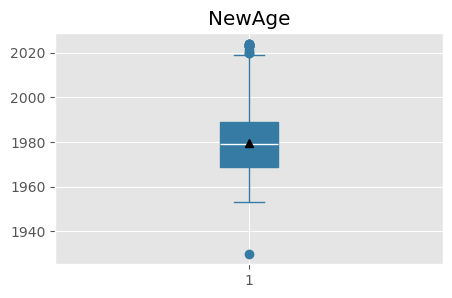

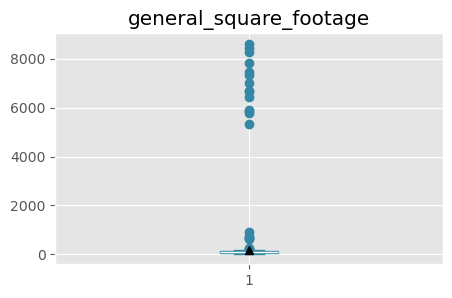

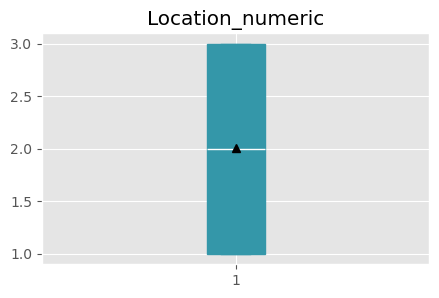

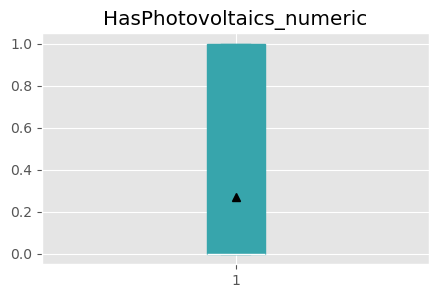

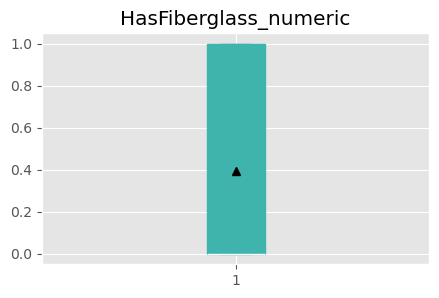

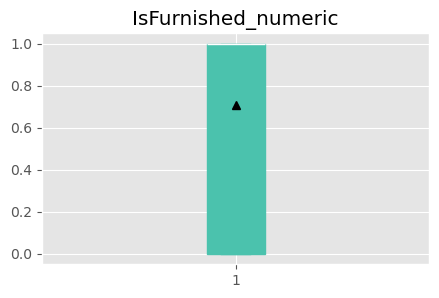

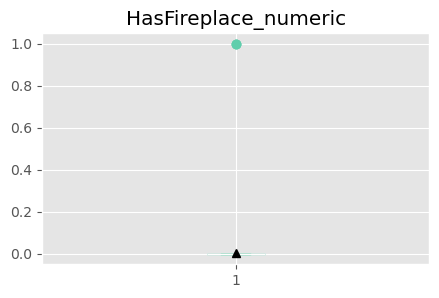

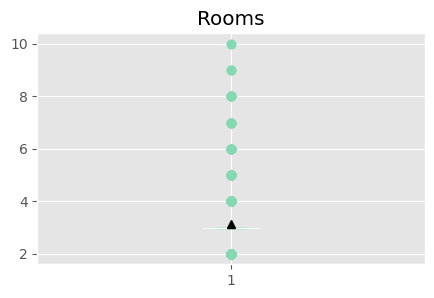

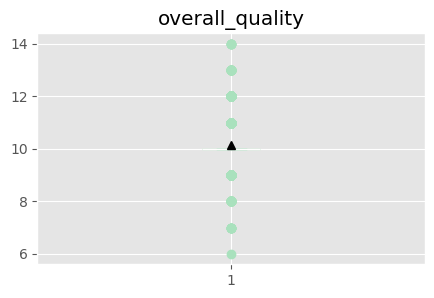

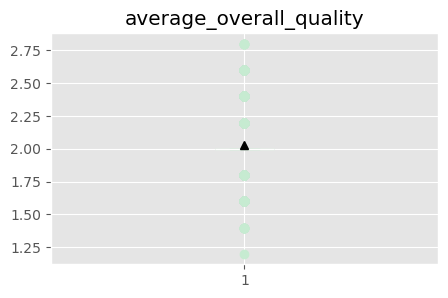

In [1926]:
palette = sns.color_palette("mako", len(df.columns))

# Iterate over the selected columns and create box plots
for i, col in enumerate(df.columns):
    data = df[[col]]
    plt.figure(figsize=(5, 3))
    
    # Create a boxplot with the chosen color and showing the mean
    plt.boxplot(data, showmeans=True, patch_artist=True, 
                boxprops=dict(facecolor=palette[i % len(palette)], color=palette[i % len(palette)]),
                whiskerprops=dict(color=palette[i % len(palette)]),
                capprops=dict(color=palette[i % len(palette)]),
                flierprops=dict(markerfacecolor=palette[i % len(palette)], markeredgecolor=palette[i % len(palette)]),
                medianprops=dict(color='white'),
                meanprops=dict(markerfacecolor='black', markeredgecolor='black'))

    # Set the title for the plot
    plt.title(col)
    
    # Show the plot
    plt.show()

#### Handling of outliers

- Potential function to deal with outliers

#### Winsorizing


In [1927]:
# Winsorize specific variables
for var in ['SquareFootageHouse', 'Price', 'general_square_footage', 'HeatingCosts', 'NewAge', 'Age']:
    df[var] = winsorize(df[var], limits=[0.05, 0.05])



#### Logarithm

In [1928]:
# We add a small constant to avoid taking the log of zero
df['log_bedrooms'] = np.log(df['Bedrooms'] + 1e-6)
df['log_bathrooms'] = np.log(df['Bathrooms'] + 1e-6)
#df['log_square_footage'] = np.log(df['SquareFootageHouse'] + 1e-6)
df['log_square_footage_garden'] = np.log(df['SquareFootageGarden'] + 1e-6)
#df['log_general_square_footage'] = np.log(df['general_square_footage'] + 1e-6)
df['log_rooms'] = np.log(df['Rooms'] + 1e-6)
df['log_heat_costs'] = np.log(df['HeatingCosts'] + 1e-6)


#### Binning

In [1929]:
# Bin 'overall_quality' into three quantiles

df['binned_average_overall_quality'] = pd.cut(df['average_overall_quality'], 5, labels=[1, 2, 3, 4, 5])
# Convert these binned labels from categorical to integers
df['binned_average_overall_quality'] = df['binned_average_overall_quality'].astype(int)

df['binned_square_footage_garden'] = pd.cut(df['log_square_footage_garden'], 5, labels=[1, 2, 3, 4, 5])
df['binned_square_footage_garden'] = df['binned_square_footage_garden'].astype(int)

df['binned_bathrooms'] = pd.cut(df['Bathrooms'], 5, labels=[1, 2, 3, 4, 5])
df['binned_bathrooms'] = df['binned_bathrooms'].astype(int)

df['binned_bedrooms'] = pd.cut(df['Bedrooms'], 5, labels=[1, 2, 3, 4, 5])
df['binned_bedrooms'] = df['binned_bedrooms'].astype(int)

df['log_binned_heating'] = pd.cut(df['log_heat_costs'], 5, labels=[1, 2, 3, 4, 5])
df['log_binned_heating'] = df['log_binned_heating'].astype(int)


In [1930]:
# Selecting only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

#numerical_df.to_csv('/Users/paulsedlmayr/Downloads/numerical_data.csv', index = False)

num_correlation_matrix = numerical_df.corr()
num_correlation_matrix

Bedrooms  Bathrooms  SquareFootageHouse  \
Bedrooms                        1.000000   0.243131            0.399159   
Bathrooms                       0.243131   1.000000            0.416605   
SquareFootageHouse              0.399159   0.416605            1.000000   
Age                            -0.021297  -0.004508           -0.010454   
PoolQuality                    -0.090048   0.031046            0.003104   
SquareFootageGarden            -0.018422  -0.025408            0.004831   
PreviousOwnerRating            -0.009405   0.013303            0.002794   
HeatingCosts                    0.190290   0.439713            0.668620   
Price                           0.257772   0.207901            0.439387   
NewAge                          0.021297   0.004508            0.010454   
general_square_footage          0.387781   0.399111            0.980028   
Location_numeric               -0.036001  -0.015964           -0.007712   
HasPhotovoltaics_numeric       -0.024914  -0.048674           -0.018935   
HasFiberglass_numeric          -0.032174  -0.022309           -0.016921   
IsFurnished_numeric            -0.026176  -0.034511            0.049962   
HasFireplace_numeric           -0.026508  -0.028691            0.013904   
Rooms                           0.647379   0.650994            0.398875   
overall_quality                -0.036009   0.003742            0.018938   
average_overall_quality        -0.036009   0.003742            0.018938   
log_bedrooms                    0.973421   0.235589            0.399039   
log_bathrooms                   0.229183   0.974922            0.416439   
log_square_footage_garden      -0.002902  -0.032484            0.002989   
log_rooms                       0.595196   0.611258            0.429627   
log_heat_costs                  0.205761   0.378399            0.660553   
binned_average_overall_quality -0.037473   0.004933            0.011763   
binned_square_footage_garden   -0.000151  -0.033696            0.002487   
binned_bathrooms                0.243131   1.000000            0.416605   
binned_bedrooms                 1.000000   0.243131            0.399159   
log_binned_heating              0.197483   0.341444            0.640145   

                                     Age  PoolQuality  SquareFootageGarden  \
Bedrooms                       -0.021297    -0.090048            -0.018422   
Bathrooms                      -0.004508     0.031046            -0.025408   
SquareFootageHouse             -0.010454     0.003104             0.004831   
Age                             1.000000     0.030461             0.022422   
PoolQuality                     0.030461     1.000000             0.487338   
SquareFootageGarden             0.022422     0.487338             1.000000   
PreviousOwnerRating            -0.023104     0.003449             0.060123   
HeatingCosts                   -0.002968     0.023359             0.056393   
Price                          -0.017196     0.072474             0.174222   
NewAge                         -1.000000    -0.030461            -0.022422   
general_square_footage         -0.006873     0.096827             0.197919   
Location_numeric                0.013487     0.015923            -0.000227   
HasPhotovoltaics_numeric       -0.010179     0.032342            -0.019464   
HasFiberglass_numeric           0.044110    -0.021052            -0.029490   
IsFurnished_numeric            -0.043134     0.043030             0.033000   
HasFireplace_numeric           -0.006956     0.042035             0.017145   
Rooms                          -0.033894    -0.048675            -0.035754   
overall_quality                -0.024740     0.465786             0.387129   
average_overall_quality        -0.024740     0.465786             0.387129   
log_bedrooms                   -0.015968    -0.089053            -0.019311   
log_bathrooms                   0.002794     0.019613            -0.038717   
log_square_footage_garden       0.023395     0.328285            

In [1931]:
# Create a pair plot showing only the plots below the diagonal
sns.pairplot(df, corner=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0.5, 1.0, 'Correlation Matrix Heatmap (Absolute values)')

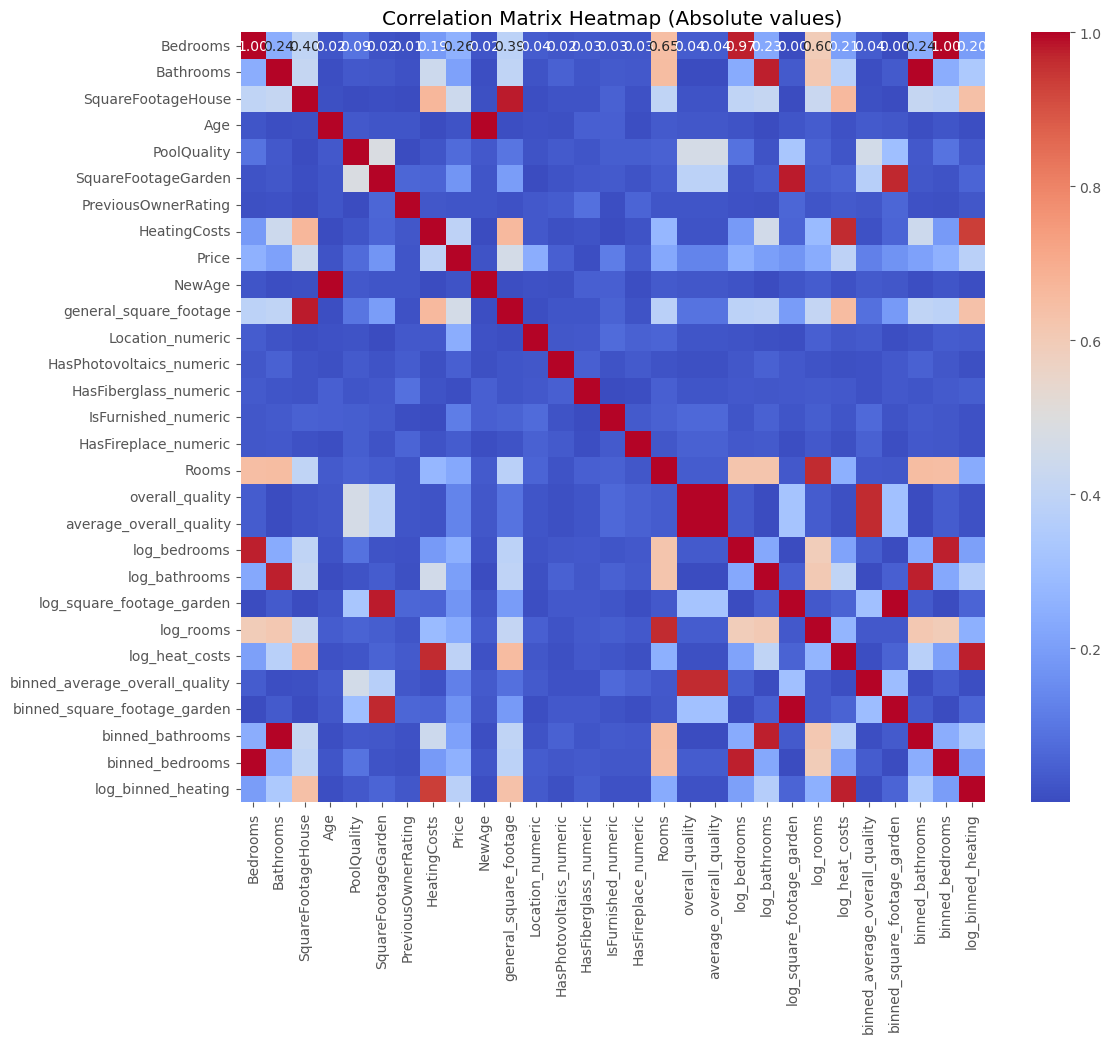

In [1932]:
# Plot pearson correlations for numerical values

plt.figure(figsize=(12, 10))
sns.heatmap(num_correlation_matrix.abs(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap (Absolute values)')

### Maximum Information Coefficient

- using external R script, therefore has to be implemented manually

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Mic Matrix Heatmap (without preporcessing)')

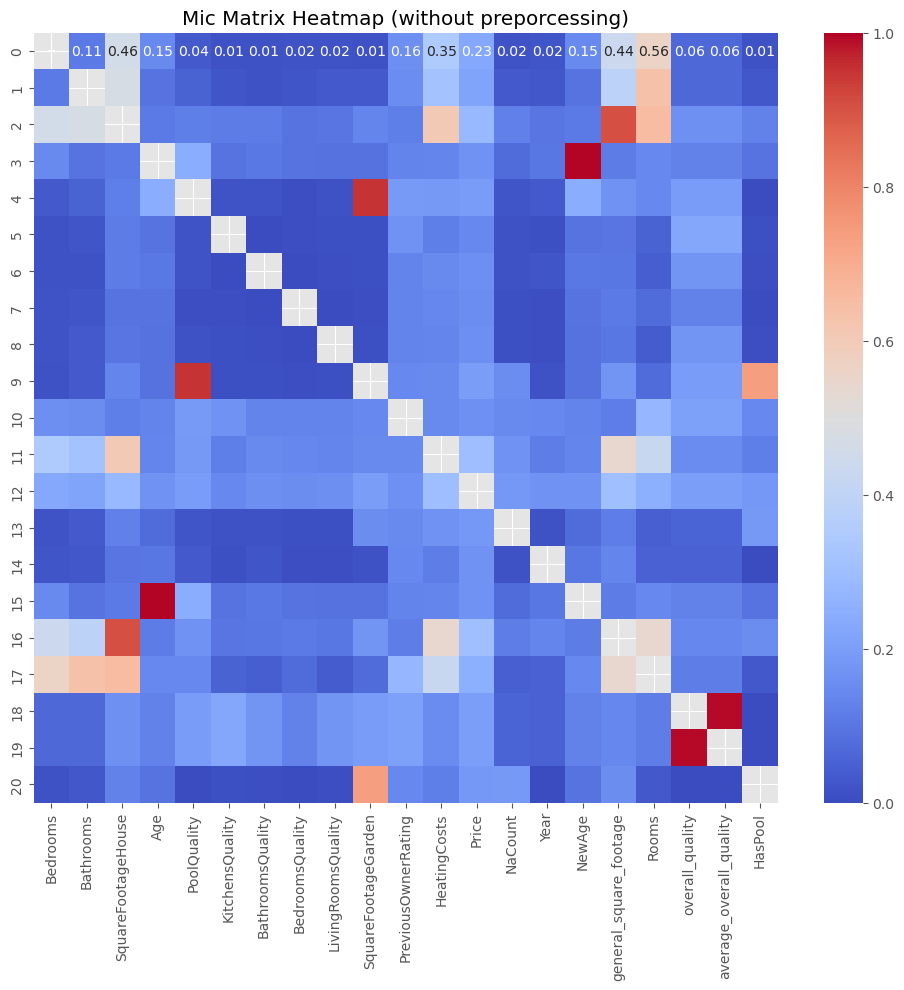

In [1933]:
# Import df with mic values
mic_correlation_matrix = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Knowledge Discovery Data Mining/KDDM HW 1/numericaL_df_rounded_matrix.csv')
#mic_correlation_matrix.to_csv('mic_correlation_matrix.csv', index=False)

#mic_correlation_matrix = pd.read_csv('mic_correlation_matrix.csv')


plt.figure(figsize=(12, 10))
sns.heatmap(mic_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mic Matrix Heatmap (without preporcessing)')


#### Remove duplicate features

In [1934]:
#df = df.drop(columns=['Age', 'overall_quality', 'Rooms', 'Bedrooms', 'Bathrooms', 'HeatingCosts', 'general_square_footage', 'SquareFootageGarden','SquareFootageHouse', 'PoolQuality', 'PreviousOwnerRating', 'log_square_footage_garden', 'average_overall_quality', 'HeatingCosts', 'log_rooms', 'log_heat_costs', 'HasFireplace_numeric'])
df = df.drop(columns=['Age', 'Rooms', 'general_square_footage', 'SquareFootageGarden', 'log_square_footage_garden', 'HeatingCosts', 'average_overall_quality', 'overall_quality', 'log_rooms', 'log_bedrooms', 'log_bathrooms', 'HeatingCosts', 'log_heat_costs', 'Bedrooms', 'Bathrooms' ])


Text(0.5, 1.0, 'Correlation Matrix Heatmap (Absolute values)')

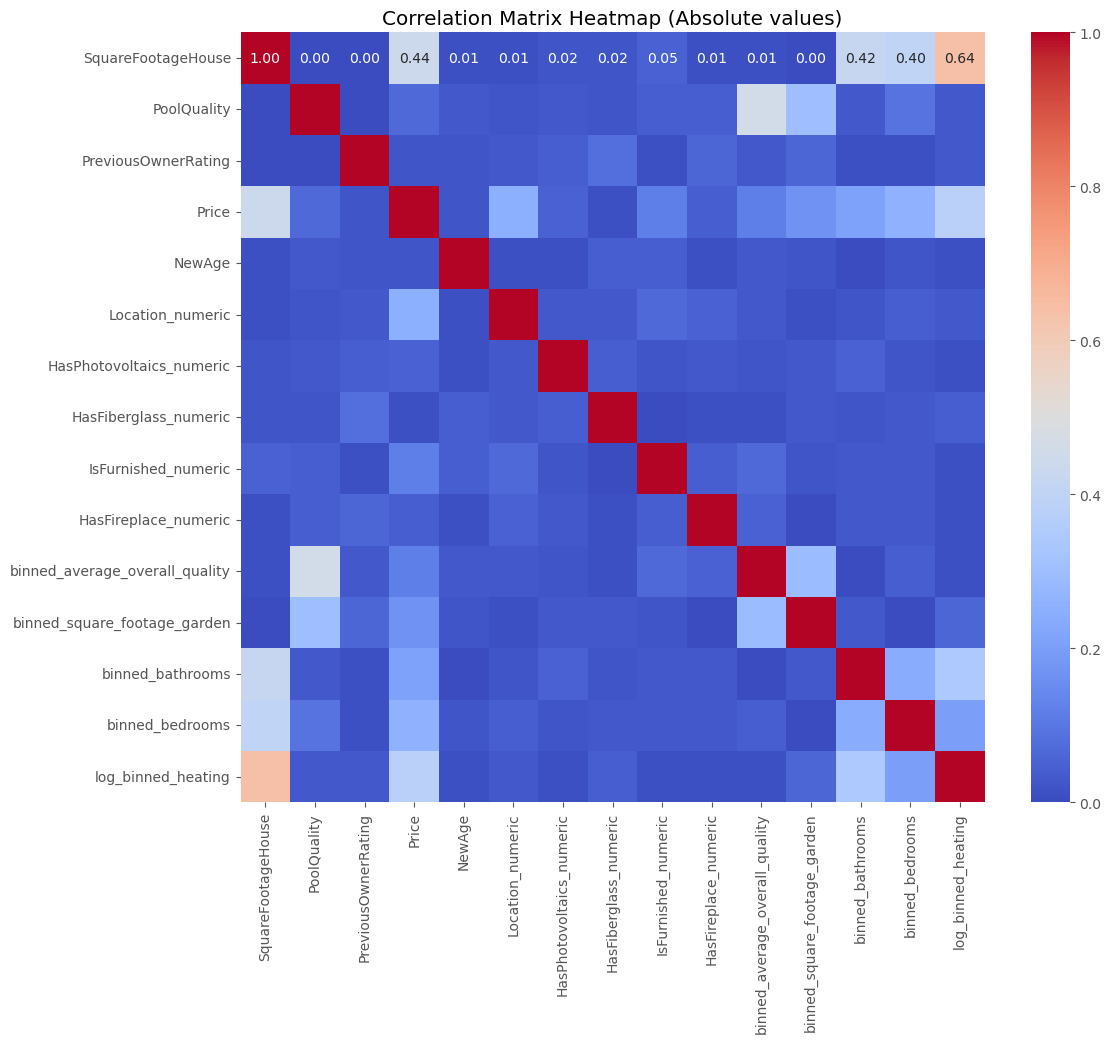

In [1935]:
df_corrmatrix_new = df.corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(df_corrmatrix_new.abs(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap (Absolute values)')

In [1936]:
# Find correlations greater than 0.7
high_corr = df_corrmatrix_new[df_corrmatrix_new.abs() > 0.7]

# Remove self-correlation by setting the diagonal to NaN
np.fill_diagonal(high_corr.values, np.nan)

# Optional: Remove NaN values to clean up the display
high_corr = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

print(high_corr)

Empty DataFrame
Columns: []
Index: []


## 3:

## Feature selection with Random Forrest Regressor

In [1937]:
from sklearn.ensemble import RandomForestRegressor

In [1938]:
target_rfr = 'Price'
features_rfr = [col for col in df.columns if col != target_rfr]

In [1939]:
x_rfr = df[features_rfr]
y_rfr = df[target_rfr]

In [1940]:
x_train_rfr, x_test_rfr, y_train_rfr, y_test_rfr = train_test_split(x_rfr, y_rfr, test_size=0.2, random_state=42)

In [1941]:
model_rfr = RandomForestRegressor()

model_rfr.fit(x_train_rfr, y_train_rfr)

importances = model_rfr.feature_importances_

importance_scores = pd.DataFrame({'Feature': features_rfr, 'Importance': importances})
importance_scores_sorted = importance_scores.sort_values(by='Importance', ascending=False)
importance_scores_sorted

Feature  Importance
0               SquareFootageHouse    0.301715
4                 Location_numeric    0.210199
2              PreviousOwnerRating    0.140745
3                           NewAge    0.095840
13              log_binned_heating    0.068770
10    binned_square_footage_garden    0.036871
9   binned_average_overall_quality    0.031327
7              IsFurnished_numeric    0.030143
12                 binned_bedrooms    0.022155
11                binned_bathrooms    0.018447
6            HasFiberglass_numeric    0.015286
5         HasPhotovoltaics_numeric    0.012590
1                      PoolQuality    0.011822
8             HasFireplace_numeric    0.004091

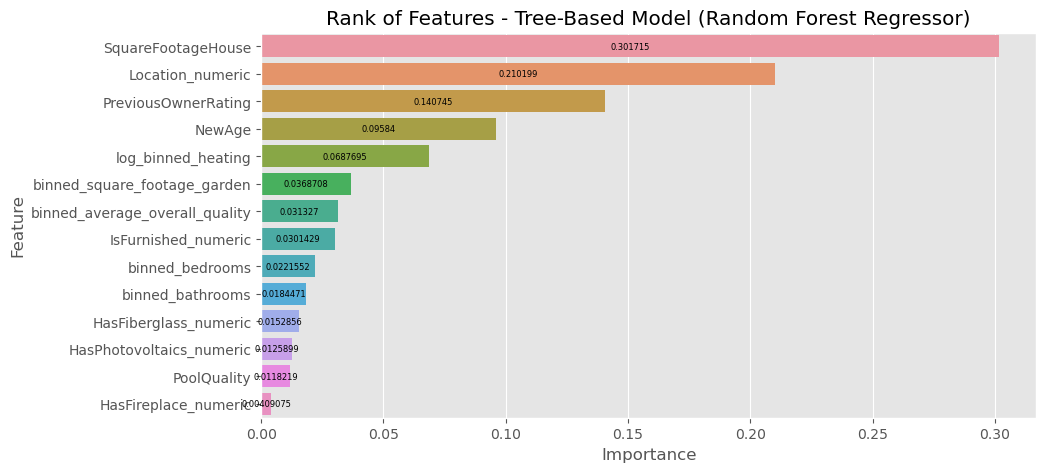

In [1942]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Importance', y='Feature', data=importance_scores_sorted)
ax.bar_label(ax.containers[0], fontsize=6, label_type='center')
plt.title('Rank of Features - Tree-Based Model (Random Forest Regressor)')
plt.show()

## Dimensionality Reduction with PCA

In [1943]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_rfr)

In [1944]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df

0         1         2         3         4         5         6   \
0   -1.065019 -0.026221 -1.036287 -1.610490 -0.010935  1.642828 -0.802887   
1    0.064575 -0.026221  0.540105  1.680640 -0.010935  1.642828 -0.802887   
2    0.979009 -0.026221  0.607185  0.309336  1.349088  1.642828 -0.802887   
3    0.710058 -0.026221  1.892894 -1.610490 -1.370958 -0.608706  1.245505   
4   -1.172599  2.345558 -1.304609  1.954901 -0.010935 -0.608706 -0.802887   
..        ...       ...       ...       ...       ...       ...       ...   
990  0.683163 -0.026221 -0.119520  0.309336 -1.370958 -0.608706 -0.802887   
991 -0.527117 -0.026221 -0.767965  1.474945 -0.010935  1.642828  1.245505   
992  1.140379 -0.026221 -0.622624  0.583597  1.349088 -0.608706 -0.802887   
993  1.597596 -0.026221 -0.555543 -0.856273  1.349088 -0.608706  1.245505   
994  0.091470 -0.026221  2.060595  1.886336  1.349088  1.642828 -0.802887   

           7         8         9         10        11        12        13  
0    0.639803 -0.054993 -0.144134  0.517072 -0.521722 -0.482033 -0.247437  
1    0.639803 -0.054993 -0.144134 -0.777234 -0.521722 -0.482033  0.519541  
2    0.639803 -0.054993 -0.144134 -0.777234 -0.521722 -0.482033  1.286519  
3    0.639803 -0.054993 -0.144134 -0.777234  0.729153 -0.482033 -1.014416  
4   -1.562980 -0.054993  1.449346  1.811377 -0.521722 -0.482033 -0.247437  
..        ...       ...       ...       ...       ...       ...       ...  
990  0.639803 -0.054993 -0.144134 -0.777234  0.729153 -0.482033  0.519541  
991 -1.562980 -0.054993 -0.144134 -0.777234 -0.521722 -0.482033  0.519541  
992 -1.562980 -0.054993 -0.144134 -0.777234  1.980028  0.766984  1.286519  
993  0.639803 -0.054993 -0.144134  1.164224  3.230903 -0.482033  1.286519  
994  0.639803 -0.054993  1.449346  1.164224 -0.521722 -0.482033 -1.014416  

[995 rows x 14 columns]

In [1945]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [1946]:
explained_variance = pca.explained_variance_ratio_
cumulative_expl_var = np.cumsum(explained_variance)
print(f"Explained Variance: {explained_variance}")
print(f"Cumulative: {cumulative_expl_var}")

Explained Variance: [0.15427206 0.12422018 0.08211968 0.07992088 0.07392609 0.06985545
 0.06936299 0.06472566 0.06250819 0.05876278 0.05465406 0.04622856
 0.03730078 0.02214263]
Cumulative: [0.15427206 0.27849224 0.36061192 0.4405328  0.51445889 0.58431434
 0.65367733 0.71840299 0.78091119 0.83967397 0.89432803 0.94055659
 0.97785737 1.        ]


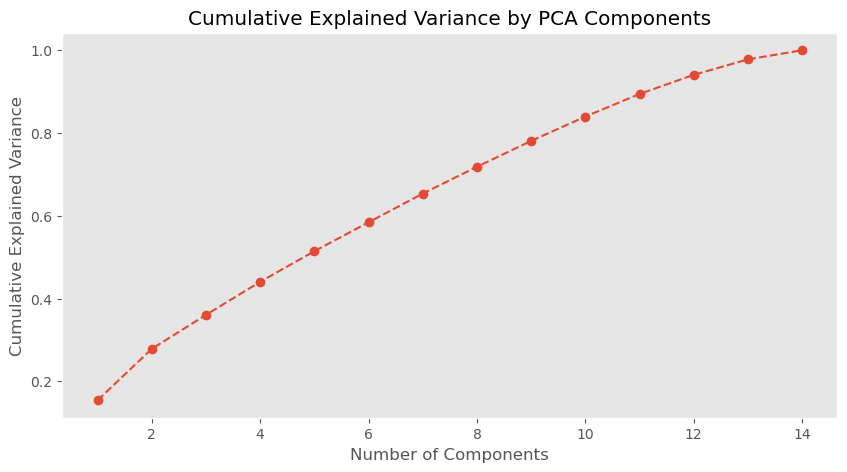

In [1947]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_expl_var)+1), cumulative_expl_var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [1948]:
num_components = np.argmax(cumulative_expl_var >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

Number of components explaining 95% variance: 13


In [1949]:
pca = PCA(n_components=num_components)
pca.fit_transform(scaled_data)

array([[-1.23787963,  0.22489567,  0.0711796 , ..., -0.43707924,
         0.60919764,  0.27894155],
       [-0.12653986, -0.28515505, -1.16582299, ..., -0.40292803,
        -0.45763252, -0.16754189],
       [ 0.7866428 , -0.228765  , -0.50690852, ..., -0.53978544,
        -0.97896451,  0.00748976],
       ...,
       [ 2.62025013, -0.66690966,  0.19229807, ...,  0.95165308,
         0.12788734,  0.08391322],
       [ 2.86984037,  0.55434407,  1.70132596, ...,  0.01028623,
         2.19263865,  0.55935195],
       [-0.90509745,  1.66500415, -1.91079643, ...,  0.00982272,
         0.13133559,  0.98984516]])

In [1950]:
loadings = pca.components_.T
loadings

array([[ 5.93068942e-01,  9.48745489e-03,  4.97583151e-02,
         4.64484250e-02,  1.40987301e-02, -4.59975081e-02,
         3.29081327e-02,  1.00940831e-01,  1.81753328e-03,
        -2.73204878e-02, -1.50849415e-01, -2.19398327e-01,
        -2.09957394e-02],
       [-3.79823485e-04,  6.00790112e-01,  3.07762496e-02,
        -4.73416874e-02,  1.13969587e-01,  1.82146519e-02,
         1.07772563e-01, -3.57901208e-02, -1.90950415e-03,
        -1.62649913e-01,  2.49659144e-01, -9.12022204e-02,
        -7.15851615e-01],
       [-4.64975529e-03,  6.38229821e-02, -5.81318599e-01,
         1.56220313e-01, -9.25222612e-02, -1.98483916e-01,
        -4.19319377e-01,  4.06545941e-01,  4.73941731e-01,
        -1.64801565e-02,  6.07020044e-02, -1.10777064e-01,
        -4.67021846e-02],
       [ 1.86415941e-02, -3.24438049e-03, -1.59306336e-01,
         3.48171146e-01, -6.39688504e-01,  1.23781676e-01,
         4.75953640e-01, -3.00327378e-01,  3.11076862e-01,
         1.50288778e-02, -7.34025564e

In [1951]:
loadings_df = pd.DataFrame(loadings)
loadings_df.columns = [col for col in range(1,(num_components+1))]
loadings_df

1         2         3         4         5         6         7   \
0   0.593069  0.009487  0.049758  0.046448  0.014099 -0.045998  0.032908   
1  -0.000380  0.600790  0.030776 -0.047342  0.113970  0.018215  0.107773   
2  -0.004650  0.063823 -0.581319  0.156220 -0.092522 -0.198484 -0.419319   
3   0.018642 -0.003244 -0.159306  0.348171 -0.639689  0.123782  0.475954   
4  -0.007869  0.003852  0.290396  0.535512  0.427082 -0.145057 -0.164995   
5  -0.040863 -0.002729 -0.323184  0.261095  0.506999  0.024453  0.637060   
6  -0.046641 -0.053845  0.407862 -0.426794 -0.045558 -0.429068  0.319727   
7  -0.003036  0.108910  0.255401  0.474872 -0.276823 -0.578653 -0.045030   
8  -0.017836  0.082124  0.444569  0.247174 -0.095335  0.631106 -0.120734   
9   0.002657  0.595622  0.010113 -0.054106 -0.101114  0.019261  0.107962   
10  0.015489  0.497908 -0.083804 -0.107371  0.027879 -0.029920 -0.138698   
11  0.454646 -0.003957 -0.022536 -0.071648  0.003751  0.005151 -0.022298   
12  0.393084 -0.093382 -0.071039 -0.064006 -0.120141  0.049449 -0.005891   
13  0.531225  0.043997  0.050857  0.050900  0.127904 -0.014996  0.040233   

          8         9         10        11        12        13  
0   0.100941  0.001818 -0.027320 -0.150849 -0.219398 -0.020996  
1  -0.035790 -0.001910 -0.162650  0.249659 -0.091202 -0.715852  
2   0.406546  0.473942 -0.016480  0.060702 -0.110777 -0.046702  
3  -0.300327  0.311077  0.015029 -0.073403  0.051754 -0.081225  
4  -0.411360  0.393115  0.195688  0.173865 -0.036194  0.059639  
5   0.351500 -0.068056  0.106797 -0.020872  0.126163  0.078903  
6   0.262396  0.518949  0.135748 -0.002825  0.005256 -0.015979  
7   0.288647 -0.418717 -0.033313 -0.020649  0.129670 -0.022966  
8   0.520961  0.166804  0.055573 -0.040298  0.081912 -0.008670  
9  -0.002545 -0.015601 -0.037474  0.287893 -0.324264  0.655332  
10 -0.114906  0.041275  0.416752 -0.533524  0.480273  0.066980  
11 -0.018989  0.102411 -0.307051  0.432501  0.687441  0.132231  
12  0.036308 -0.169170  0.753067  0.349136 -0.126725 -0.127375  
13 -0.042748  0.076965 -0.251992 -0.443436 -0.251743  0.006349

In [1952]:
loadings_df.insert(loc=0, column='Feature', value=features_rfr)
loadings_df

Feature         1         2         3         4  \
0               SquareFootageHouse  0.593069  0.009487  0.049758  0.046448   
1                      PoolQuality -0.000380  0.600790  0.030776 -0.047342   
2              PreviousOwnerRating -0.004650  0.063823 -0.581319  0.156220   
3                           NewAge  0.018642 -0.003244 -0.159306  0.348171   
4                 Location_numeric -0.007869  0.003852  0.290396  0.535512   
5         HasPhotovoltaics_numeric -0.040863 -0.002729 -0.323184  0.261095   
6            HasFiberglass_numeric -0.046641 -0.053845  0.407862 -0.426794   
7              IsFurnished_numeric -0.003036  0.108910  0.255401  0.474872   
8             HasFireplace_numeric -0.017836  0.082124  0.444569  0.247174   
9   binned_average_overall_quality  0.002657  0.595622  0.010113 -0.054106   
10    binned_square_footage_garden  0.015489  0.497908 -0.083804 -0.107371   
11                binned_bathrooms  0.454646 -0.003957 -0.022536 -0.071648   
12                 binned_bedrooms  0.393084 -0.093382 -0.071039 -0.064006   
13              log_binned_heating  0.531225  0.043997  0.050857  0.050900   

           5         6         7         8         9        10        11  \
0   0.014099 -0.045998  0.032908  0.100941  0.001818 -0.027320 -0.150849   
1   0.113970  0.018215  0.107773 -0.035790 -0.001910 -0.162650  0.249659   
2  -0.092522 -0.198484 -0.419319  0.406546  0.473942 -0.016480  0.060702   
3  -0.639689  0.123782  0.475954 -0.300327  0.311077  0.015029 -0.073403   
4   0.427082 -0.145057 -0.164995 -0.411360  0.393115  0.195688  0.173865   
5   0.506999  0.024453  0.637060  0.351500 -0.068056  0.106797 -0.020872   
6  -0.045558 -0.429068  0.319727  0.262396  0.518949  0.135748 -0.002825   
7  -0.276823 -0.578653 -0.045030  0.288647 -0.418717 -0.033313 -0.020649   
8  -0.095335  0.631106 -0.120734  0.520961  0.166804  0.055573 -0.040298   
9  -0.101114  0.019261  0.107962 -0.002545 -0.015601 -0.037474  0.287893   
10  0.027879 -0.029920 -0.138698 -0.114906  0.041275  0.416752 -0.533524   
11  0.003751  0.005151 -0.022298 -0.018989  0.102411 -0.307051  0.432501   
12 -0.120141  0.049449 -0.005891  0.036308 -0.169170  0.753067  0.349136   
13  0.127904 -0.014996  0.040233 -0.042748  0.076965 -0.251992 -0.443436   

          12        13  
0  -0.219398 -0.020996  
1  -0.091202 -0.715852  
2  -0.110777 -0.046702  
3   0.051754 -0.081225  
4  -0.036194  0.059639  
5   0.126163  0.078903  
6   0.005256 -0.015979  
7   0.129670 -0.022966  
8   0.081912 -0.008670  
9  -0.324264  0.655332  
10  0.480273  0.066980  
11  0.687441  0.132231  
12 -0.126725 -0.127375  
13 -0.251743  0.006349

In [1953]:
from sklearn.model_selection import GridSearchCV

In [1954]:
scaled_data

array([[-1.065019  , -0.02622067, -1.03628663, ..., -0.52172168,
        -0.48203259, -0.24743723],
       [ 0.06457527, -0.02622067,  0.54010459, ..., -0.52172168,
        -0.48203259,  0.51954109],
       [ 0.97900873, -0.02622067,  0.60718507, ..., -0.52172168,
        -0.48203259,  1.28651941],
       ...,
       [ 1.14037935, -0.02622067, -0.62262369, ...,  1.98002806,
         0.76698414,  1.28651941],
       [ 1.59759608, -0.02622067, -0.55554321, ...,  3.23090293,
        -0.48203259,  1.28651941],
       [ 0.09147038, -0.02622067,  2.06059541, ..., -0.52172168,
        -0.48203259, -1.01441554]])

In [1955]:
y_rfr

0       96.41513
1       78.56870
2      184.70391
3      246.09376
4      241.27139
         ...    
995    359.48594
996    128.11242
997    290.95095
998    226.64546
999    227.99903
Name: Price, Length: 995, dtype: float64

In [1956]:
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(scaled_data, y_rfr, test_size=0.2, random_state=42)

In [1957]:
x_train_rfc

array([[-0.52711696, -0.02622067, -0.3431217 , ...,  0.72915319,
        -0.48203259,  0.51954109],
       [ 0.03768017, -0.02622067, -0.33194162, ..., -0.52172168,
        -0.48203259,  0.51954109],
       [ 0.87142833, -0.02622067, -1.52821014, ...,  0.72915319,
        -0.48203259,  1.28651941],
       ...,
       [ 0.36042139, -0.02622067,  0.54010459, ..., -0.52172168,
         2.01600088, -0.24743723],
       [-0.52711696,  2.34555795,  2.29537708, ...,  0.72915319,
         0.76698414,  0.51954109],
       [ 1.16727445, -0.02622067,  0.33886316, ...,  0.72915319,
        -0.48203259, -0.24743723]])

In [1958]:
y_train_rfc

914    209.01239
930    111.83389
979    385.56389
770    135.92850
916     81.76093
         ...    
107     71.01309
272    177.42720
865    203.16892
437    184.94654
103    198.68932
Name: Price, Length: 796, dtype: float64

In [1959]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

randfo = RandomForestRegressor()
grid_search = GridSearchCV(estimator=randfo, param_grid=param_grid_rfc, cv=5) #, scoring='f1')
grid_search.fit(x_train_rfc, y_train_rfc)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [1960]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [1961]:
best_randfo = RandomForestRegressor(**best_params, random_state=42)
best_randfo.fit(x_train_rfc, y_train_rfc)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [1962]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#print("Mean Squared Error:", mean_squared_error(y_test_rfc, y_train_rfc)) # edite y_train_rfc insteaf of y_pred
#print("Mean Absolute Error:", mean_absolute_error(y_test_rfc, y_train_rfc))
#print("R² Score:", r2_score(y_test_rfc, y_train_rfc))

## Vanilla MLR to check significance of predictors

In [1963]:
X = df.drop(columns=['Price'])
y = df['Price']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)



# Adding a constant to the predictor variables
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     34.04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.16e-74
Time:                        14:12:29   Log-Likelihood:                -5769.5
No. Observations:                 995   AIC:                         1.157e+04
Df Residuals:                     980   BIC:                         1.164e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## New appraoch for GridSearch MLR

In [1964]:

X = df.drop(columns=['Price'])
y = df['Price']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Split data
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

# Parameters grid
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
randfo = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=randfo, param_grid=param_grid_rfc, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train_rfc, y_train_rfc)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_squared_error):", grid_search.best_score_)

# Optionally, evaluate on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test_rfc)
print("Test Set R² Score:", r2_score(y_test_rfc, predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, 

## Using MAE as optimization criterion

In [1965]:

X = df.drop(columns=['Price'])
y = df['Price']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Split data
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

# Parameters grid
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
randfo = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=randfo, param_grid=param_grid_rfc, cv=5,
                           scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train_rfc, y_train_rfc)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_absolute_error):", grid_search.best_score_)

# Optionally, evaluate on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test_rfc)
print("Test Set R² Score:", r2_score(y_test_rfc, predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, 

A MAE of -56 means our model is usually 56 units (likely 56 thousand dollars / euros) off 

In [1966]:
# Get the best model
best_model = grid_search.best_estimator_

# Print all hyperparameters of the best model
print("All hyperparameters of the best model:", best_model.get_params())



All hyperparameters of the best model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [1967]:
from sklearn.model_selection import cross_val_score

In [1968]:
cv_scores = cross_val_score(best_randfo, scaled_data, y_rfr, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Errors: {cv_scores}")
print(f"Average Mean Squared Error: {cv_scores.mean()}")

Cross-Validation Mean Squared Errors: [-4912.885819   -4826.43657672 -6438.11098097 -5343.41523548
 -5347.63691209]
Average Mean Squared Error: -5373.697104853223


In [1969]:
from sklearn.metrics import make_scorer, mean_squared_error

In [1970]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(best_randfo, scaled_data, y_rfr, cv=5, scoring=mse_scorer)
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average MSE: {cv_scores.mean()}")

Cross-Validation MSE Scores: [-4912.885819   -4826.43657672 -6438.11098097 -5343.41523548
 -5347.63691209]
Average MSE: -5373.697104853223


## Convert to discrete values
-

In [1971]:
from sklearn.preprocessing import LabelEncoder

In [1972]:
le = LabelEncoder()
y_train_rfc = le.fit_transform(y_train_rfc)